In [1]:
import torch
import torch.nn as nn
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, PowerTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

df = pd.read_csv('../Time Series Data/time_series_covid_19_confirmed.csv')
df.dropna(inplace = True)
x = np.arange('2020-01-22', '2020-04-21', dtype = 'datetime64[D]')
#df['Country/Region Code'] = df['Country/Region'].astype('category').cat.codes.values
#df['Province/State Code'] =  df['Province/State'].astype('category').cat.codes.values
a = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis = 1, inplace  = False)
df2 = pd.DataFrame()
for i,name in enumerate(df['Country/Region']):
    df2[name + " : " + df['Province/State'].iloc[i]] = a.iloc[i]
    

In [2]:
def plotGraph(name):
    plt.figure(figsize = (12,10))
    plt.title(name)
    plt.plot(df2[name])
    plt.autoscale(axis='x',tight=True)
    plt.xlim(('3/13/20','4/2/20'))

def test_train(name,test_size,num):
    m = df2[name].values.astype(float)
    train_set = m[num:-test_size]
    test_set = m[-test_size:]
    return train_set, test_set

def input_data(seq,ws):
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out


    scaler = PowerTransformer(method='box-cox', standardize=False)
    x_norm2 = scaler.fit_transform(train_set.reshape(-1,1))
    train_norms = torch.FloatTensor(x_norm2).view(-1)
    

def training(epoch, train_data, losses):
    for i in range(epoch):
        for seq,y_train in train_data:
            optimizer.zero_grad()
            model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
            y_pred = model(seq)
            loss = torch.sqrt(criterion(y_pred, y_train))
            loss.backward()
            optimizer.step()
        print(f'epoch: {i} loss: {loss.item()}')
        losses.append(loss.item())

    

df2

,Australia : Australian Capital Territory,Australia : New South Wales,Australia : Northern Territory,Australia : Queensland,Australia : South Australia,Australia : Tasmania,Australia : Victoria,Australia : Western Australia,Canada : Alberta,Canada : British Columbia,...,United Kingdom : Isle of Man,United Kingdom : Montserrat,Canada : Diamond Princess,Canada : Recovered,Canada : Northwest Territories,Canada : Yukon,United Kingdom : Anguilla,United Kingdom : British Virgin Islands,United Kingdom : Turks and Caicos Islands,"Netherlands : Bonaire, Sint Eustatius and Saba"
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/27/20,0,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/28/20,0,4,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1/29/20,0,4,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1/30/20,0,4,0,3,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1/31/20,0,4,0,2,0,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0


7

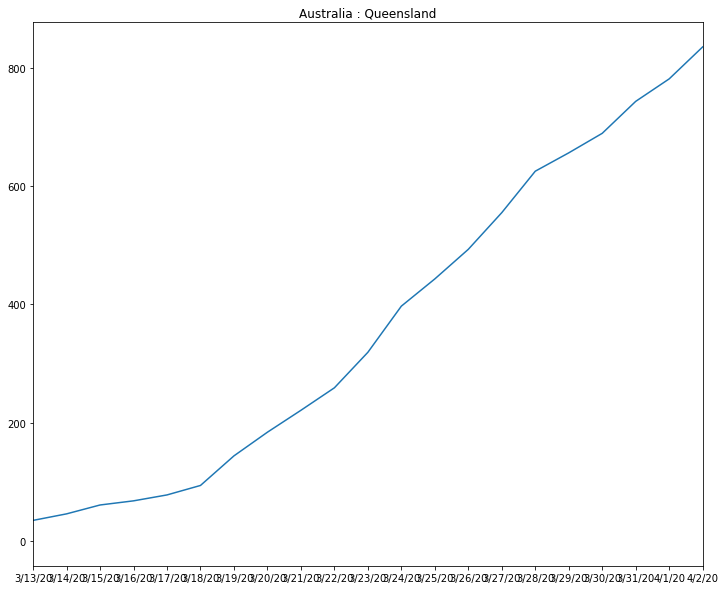

In [3]:
plotGraph('Australia : Queensland')
x = []
y = 50
for num in df2['Australia : Queensland']:
    if(num == 0):
        x.append(num)
if(len(x)>=50):
    y = len(x)
train_set,test_set = test_train('Australia : Queensland',7,y)
len(x)

In [4]:
class LSTMcell(nn.Module):
    def __init__(self, input_size = 1, hidden_size = 175, output_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)
        self.hidden = (torch.zeros(1,1,self.hidden_size), torch.zeros(1,1,self.hidden_size))
        
    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [5]:
torch.manual_seed(60)
model = LSTMcell()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001)
model

LSTMcell(
  (lstm): LSTM(1, 175)
  (linear): Linear(in_features=175, out_features=1, bias=True)
)

In [6]:
scaler = StandardScaler()
x_norm2 = scaler.fit_transform(train_set.reshape(-1,1))
train_norms = torch.FloatTensor(x_norm2).view(-1)
    

In [7]:
epochs = 29
losses = []
train_data = input_data(train_norms,3)
for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        y_pred = model(seq)
        loss = torch.sqrt(criterion(y_pred, y_train))
        loss.backward()
        optimizer.step()
    print(f'epoch: {i} loss: {loss.item()}')
    losses.append(loss.item())


epoch: 0 loss: 2.0066373348236084
epoch: 1 loss: 1.9959603548049927
epoch: 2 loss: 1.9844335317611694
epoch: 3 loss: 1.9716578722000122
epoch: 4 loss: 1.9579064846038818
epoch: 5 loss: 1.9437024593353271
epoch: 6 loss: 1.9291223287582397
epoch: 7 loss: 1.914121389389038
epoch: 8 loss: 1.8986200094223022
epoch: 9 loss: 1.8825258016586304
epoch: 10 loss: 1.8657383918762207
epoch: 11 loss: 1.8481489419937134
epoch: 12 loss: 1.8296396732330322
epoch: 13 loss: 1.8100813627243042
epoch: 14 loss: 1.7893325090408325
epoch: 15 loss: 1.7672361135482788
epoch: 16 loss: 1.743618369102478
epoch: 17 loss: 1.718285083770752
epoch: 18 loss: 1.6910187005996704
epoch: 19 loss: 1.6615747213363647
epoch: 20 loss: 1.6296770572662354
epoch: 21 loss: 1.5950140953063965
epoch: 22 loss: 1.55723237991333
epoch: 23 loss: 1.5159306526184082
epoch: 24 loss: 1.4706530570983887
epoch: 25 loss: 1.4208803176879883
epoch: 26 loss: 1.3660213947296143
epoch: 27 loss: 1.3054022789001465
epoch: 28 loss: 1.2382564544677734


In [ ]:
train_data

In [8]:
window_size = 7
future = 7
pred = train_norms[-window_size:].tolist()
for i in range(future):
    with torch.no_grad():
        seq = torch.FloatTensor(pred[-window_size:])
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        pred.append(model(seq).item())
    

In [9]:
pred[-7:]

[2.065882444381714,
 2.5468204021453857,
 2.992060899734497,
 3.384279489517212,
 3.6865601539611816,
 3.8950302600860596,
 4.064244747161865]

In [11]:
z = scaler.inverse_transform(np.array(pred).reshape(-1,1))

In [12]:
z

array([[183.99999985],
       [221.00000047],
       [259.000002  ],
       [318.99999962],
       [396.99999197],
       [442.99999167],
       [493.00000638],
       [506.42212763],
       [579.89903911],
       [647.92215123],
       [707.84466335],
       [754.02660691],
       [785.87632741],
       [811.72863889]])

(array([61.]), array([71.]))

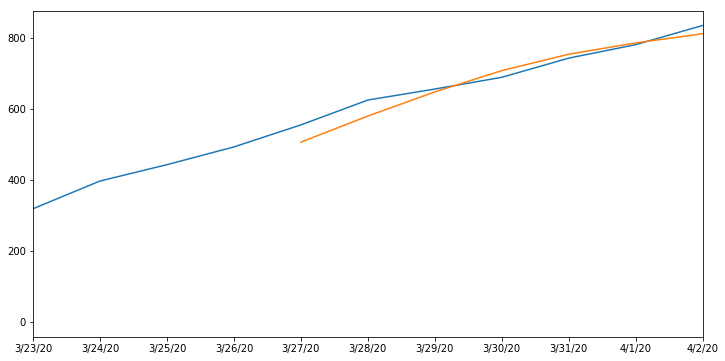

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df2['Australia : Queensland'])
plt.plot(['3/27/20','3/28/20','3/29/20','3/30/20','3/31/20','4/1/20','4/2/20'],z[-7:])
plt.xlim(('3/23/20','4/2/20'))

In [15]:
all_data_norm = scaler.fit_transform(df2['Australia : Queensland'].values.astype('float64').reshape(-1,1))
all_data_norm = torch.FloatTensor(all_data_norm).view(-1)
all_data = input_data(all_data_norm,7)

In [16]:
epochs = 1
losses = []

for i in range(epochs):
    for seq, y_train in all_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        y_pred = model(seq)
        loss = (criterion(y_pred, y_train))
        loss.backward()
        optimizer.step()
    print(f'epoch: {i} loss: {loss.item()}')
    losses.append(loss.item())


epoch: 0 loss: 0.12734712660312653


In [17]:
pred = all_data_norm[-7:].tolist()
for i in range(future):
    with torch.no_grad():
        seq = torch.FloatTensor(pred[-7:])
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        pred.append(model(seq).item())
        

In [18]:
pred[-7:]

[3.6446595191955566,
 3.7742202281951904,
 3.8739120960235596,
 3.967313766479492,
 4.0525803565979,
 4.1212873458862305,
 4.180985927581787]

In [19]:
z = scaler.inverse_transform(np.array(pred).reshape(-1,1))

In [20]:
z

array([[ 554.99998171],
       [ 624.99998455],
       [ 656.00001943],
       [ 689.0000245 ],
       [ 743.00000428],
       [ 781.00001329],
       [ 834.99999306],
       [ 911.16738574],
       [ 939.59058323],
       [ 961.46111534],
       [ 981.95169575],
       [1000.6575916 ],
       [1015.73062061],
       [1028.8273734 ]])

(array([61.]), array([78.]))

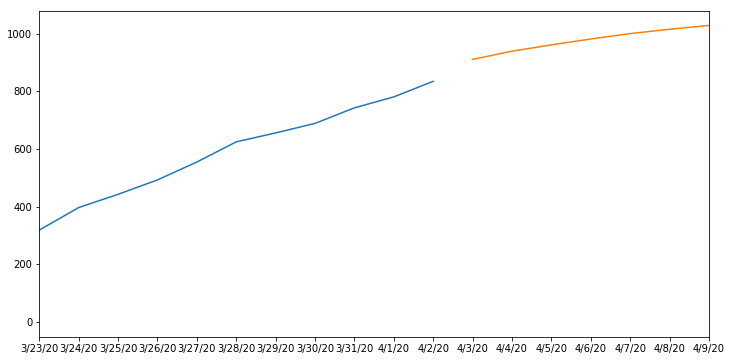

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df2['Australia : Queensland'])
plt.plot(['4/3/20','4/4/20','4/5/20','4/6/20','4/7/20','4/8/20','4/9/20'],z[-7:])
plt.xlim(('3/23/20','4/9/20'))